[[1.00000000e+02 1.01574668e+02 1.03148946e+02 1.04722442e+02
  1.06294768e+02 1.07865533e+02 1.09434347e+02 1.11000822e+02
  1.12564569e+02 1.14125200e+02 1.15682329e+02 1.17235569e+02
  1.18784535e+02 1.20328842e+02 1.21868109e+02 1.23401953e+02
  1.24929994e+02 1.26451853e+02 1.27967153e+02 1.29475517e+02
  1.30976573e+02 1.32469947e+02 1.33955269e+02 1.35432172e+02
  1.36900288e+02 1.38359254e+02 1.39808707e+02 1.41248290e+02
  1.42677644e+02 1.44096414e+02 1.45504251e+02 1.46900803e+02
  1.48285725e+02 1.49658674e+02 1.51019308e+02 1.52367291e+02
  1.53702289e+02 1.55023970e+02 1.56332006e+02 1.57626073e+02
  1.58905851e+02 1.60171021e+02 1.61421271e+02 1.62656290e+02
  1.63875772e+02 1.65079414e+02 1.66266919e+02 1.67437991e+02
  1.68592340e+02 1.69729680e+02 1.70849729e+02 1.71952209e+02
  1.73036847e+02 1.74103374e+02 1.75151525e+02 1.76181040e+02
  1.77191665e+02 1.78183148e+02 1.79155244e+02 1.80107711e+02
  1.81040314e+02 1.81952821e+02 1.82845006e+02 1.83716648e+02
  1.8456

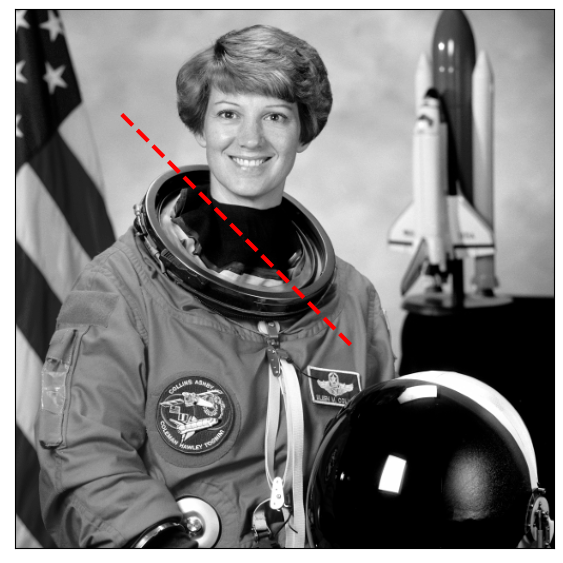

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage.segmentation import active_contour
from skimage import io, morphology, segmentation


img = data.astronaut()
img = rgb2gray(img)
edges = sobel(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T
# x, y = np.meshgrid(np.linspace(0, img.shape[1]-1, 100),
#                    np.linspace(0, img.shape[0]-1, 100))
# init = np.array([x.ravel(), y.ravel()]).T
# init = segmentation.find_boundaries(edges)

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()